In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# k-means clustering

### 데이터 준비
* 테스트 데이터 생성
    * make_blobs()

In [ ]:
# 3개의 군집을 가지는 테스트 데이터 생성
# sample data

from sklearn.datasets import make_blobs
features, targets = make_blobs(n_samples=200, 
                    n_features=2,
                    centers=3,
                    cluster_std=0.8,
                    random_state=0)

print(features.shape, targets.shape)

(200, 2) (200,)


In [3]:
# 생성된 테스트데이터로 DataFrame 만들기
cluster_df = pd.DataFrame(features, columns=['feature1','feature2'])
cluster_df['target'] = targets
cluster_df.head(3)

,feature1,feature2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


In [4]:
# target 데이터의 빈도수
cluster_df['target'].value_counts()

target
0    67
1    67
2    66
Name: count, dtype: int64

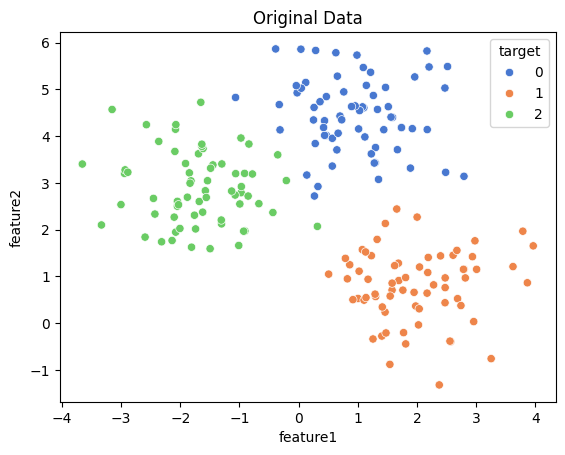

In [5]:
# 데이터 시각화
sns.scatterplot(data=cluster_df, x='feature1', y='feature2', 
                hue='target', palette='muted');
plt.title('Original Data');

### 군집화

In [28]:
# 클러스터링 객체 생성
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)

# 학습 및 클러스터링 결과 예측
# 학습습
#km.fit(features)

# 군집화 시행(예측)
#km.predict(features)

# 학습 및 클러스터링 한번에 시행
kmeans_cluster = km.fit_predict(features)

print(kmeans_cluster)

[1 2 2 1 2 1 0 0 2 1 2 1 2 2 2 1 0 0 2 1 1 0 2 2 1 2 0 1 1 1 2 2 1 2 0 0 2
 0 0 1 0 1 1 1 2 2 2 1 2 2 2 0 1 1 1 1 0 0 2 2 1 1 2 0 0 1 0 0 1 0 0 2 2 1
 2 1 0 0 0 1 1 2 2 0 0 2 2 1 2 0 1 1 0 2 0 2 2 1 1 0 0 2 1 2 1 2 0 2 1 0 2
 1 0 1 2 2 2 0 1 1 0 0 1 2 0 2 1 0 1 2 1 0 0 0 2 0 0 2 0 1 1 1 2 0 0 2 1 1
 0 2 0 1 1 1 2 0 0 0 2 2 0 1 1 1 2 2 0 1 0 0 2 0 2 0 1 1 2 1 2 0 2 1 0 0 0
 2 1 0 2 2 1 1 0 0 0 0 1 0 2 0]


In [31]:
# 데이터프레임에 군집와와 결과인 kmeans_cluster 컬럼 추가
cluster_df['kmeans_cluster'] = kmeans_cluster
cluster_df.head()

,feature1,feature2,target,kmeans_cluster
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,2
2,1.100228,4.606317,0,2
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,2


In [32]:
# 클러스터의 중심
km.cluster_centers_

array([[ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224],
       [ 0.990103  ,  4.44666506]])

<Axes: title={'center': 'Original Data'}, xlabel='feature1', ylabel='feature2'>

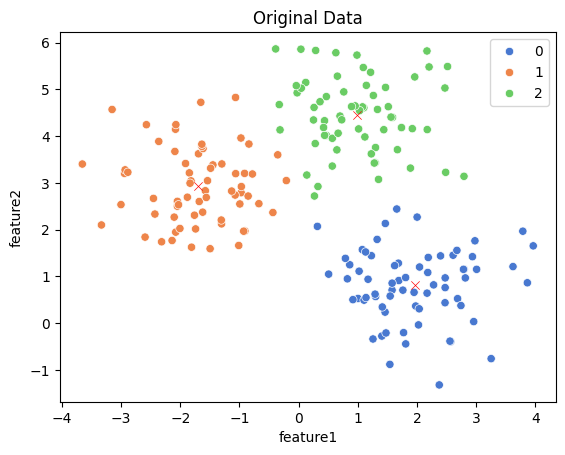

In [33]:
# 군집화 결과 시각화
# 데이터 시각화
sns.scatterplot(data=cluster_df, x='feature1', y='feature2', 
                hue=kmeans_cluster, palette='muted');
plt.title('Original Data');

# 개별 군집의 중심 좌표
sns.scatterplot(x=km.cluster_centers_[:,0], 
                y=km.cluster_centers_[:, 1], 
                color='r',
                marker='x')

### elbow 방법

548.0904569461313
240.0078759459446
209.20784030212116
182.7799493994566
153.0805067568129
[548.0904569461313, 240.0078759459446, 209.20784030212116, 182.7799493994566, 153.0805067568129]


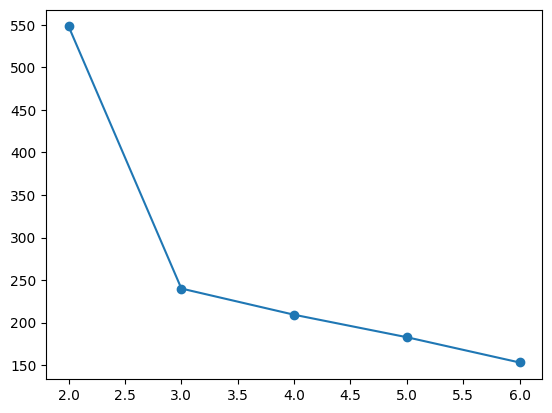

In [37]:
# inertia_: 각 데이터 포인트와 그 데이터가 속한 군집의 중심점 사이의 거리 제곱합 
km.inertia_

inertia = []

# 군집 2-7개 -> inertia 확인인
for i in range(2, 7):
    km = KMeans(i)
    km.fit(features)
    print(km.inertia_)
    inertia.append(km.inertia_)

print(inertia)


# inertia 시각화
plt.plot(range(2, 7), inertia, marker='o')


In [11]:
# inertia 시각화


### 실루엣 분석

In [12]:
# 개별 실루엣 계수 (군집 평가 지표)


In [13]:
# 다른 군집에 클러스터가 할당된 데이터가 있는지 확인


In [14]:
# 평균 실루엣 계수


In [15]:
# 최적의 실루엣 찾기


# DBSCAN

### 데이터 준비

In [16]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    shuffle=True,
                    noise=0.05,
                    random_state=0,
                    factor=0.5)

df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y

df.head()

,feature1,feature2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1


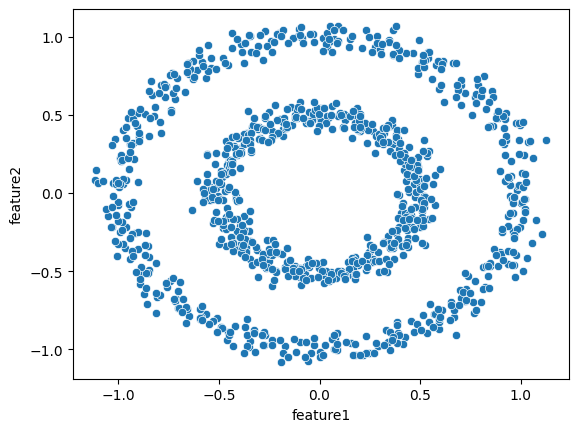

In [17]:
sns.scatterplot(data=df, x='feature1', y='feature2');

### k-means clustering

In [18]:
from sklearn.cluster import KMeans

# 클래스로 객체 생성
km = KMeans(n_clusters=2, random_state=0)

# 클러스터링
df['kmeans'] = km.fit_predict(X)
df.head()

,feature1,feature2,target,kmeans
0,0.519781,-0.015981,1,0
1,-0.057719,-0.420279,1,0
2,-0.805155,-0.662227,0,1
3,0.316549,0.312730,1,0
4,-0.304804,0.407563,1,1


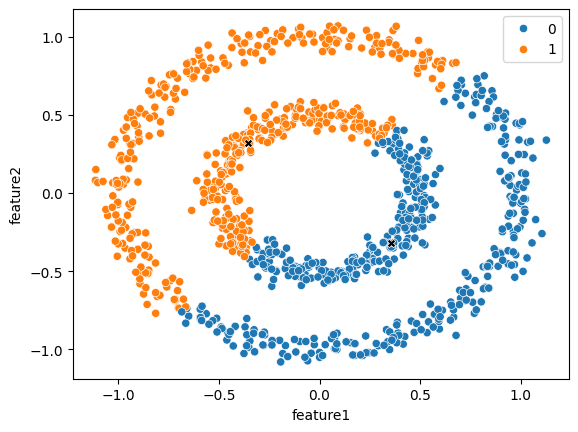

In [19]:
sns.scatterplot(data=df, x='feature1', y='feature2', hue='kmeans');
sns.scatterplot(x=km.cluster_centers_[:,0], 
                y=km.cluster_centers_[:,1],
                marker='X', color='k');

### DBSCAN